### Data visualization

In [513]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from PIL import Image

In [514]:
import seaborn as sns

sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("tab20b")

palette='tab20b'
primary_color = sns.color_palette('tab20b')[0]
title_fontsize = '25'

In [515]:
image_folder_path = '../images/aculei-images/'
csv_path = '../datasets/aculei.csv'

In [516]:
df = pd.read_csv(csv_path, index_col=0)

In [517]:
# sorting a lil bit
df.sort_values('date', inplace=True)
df.sort_values('camera', inplace=True)

In [518]:
# modifying date_time column dtype
df['date_time'] = pd.to_datetime(df['date_time'])

In [519]:
# useful fun
def to_percent(y, _):
    return '{:.0f}%'.format(y * 100)

### Some insigths about the data

In [520]:
df.shape

(16874, 8)

In [521]:
df.sample(5)

image_name  camera           date_time        date  \
11570  TF_ACULEI_16046_DSCF0663.jpg     4.0 2023-06-05 22:09:20  2023-06-05   
4679   TF_ACULEI_10003_IMAG0097.jpg     3.0 2021-12-03 21:06:41  2021-12-03   
541     TF_ACULEI_5239_DSCF5526.jpg     1.0 2021-06-20 02:51:55  2021-06-20   
5671   TF_ACULEI_10278_IMAG0069.jpg     3.0 2022-01-07 06:13:38  2022-01-07   
7644    TF_ACULEI_5679_DSCF6001.jpg     1.0 2021-06-22 01:39:04  2021-06-22   

           time             moon  temp  \
11570  22:09:20   Waning Gibbous  13.0   
4679   21:06:41         New Moon   NaN   
541    02:51:55   Waxing Gibbous  20.0   
5671   06:13:38  Waxing Crescent   NaN   
7644   01:39:04   Waxing Gibbous  22.0   

                                                 sha-256  
11570  d11c517165a5ffdbf8b6026625430557a1442644d44f7b...  
4679   ac71a69982352ba47913d038d13f622cb2aa233a73985c...  
541    23e5890d7a77ab19497a0be1b4e2f91596edd366736757...  
5671   042ec92b82f859836d5b26c7ca9fc3a7e32c46c715530e...  
7644   ce399e68be706cf9537793b704e774f3fd9936554bfa00...

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 3154 to 16622
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   image_name  16874 non-null  object        
 1   camera      16219 non-null  float64       
 2   date_time   16862 non-null  datetime64[ns]
 3   date        16862 non-null  object        
 4   time        16862 non-null  object        
 5   moon        16862 non-null  object        
 6   temp        14063 non-null  float64       
 7   sha-256     16874 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 1.2+ MB


In [523]:
print('Null values\n')
print(df.isnull().sum())

Null values

image_name       0
camera         655
date_time       12
date            12
time            12
moon            12
temp          2811
sha-256          0
dtype: int64


In [524]:
print('Unique cameras\n')
print(df['camera'].value_counts())

Unique cameras

1.0    9076
4.0    2764
6.0    1559
5.0    1139
3.0     995
7.0     498
2.0     188
Name: camera, dtype: int64


In [525]:
print('Time period\n')

min = df['date_time'].min()
max = df['date_time'].max()

print(f'Min date: {min}\nMax date: {max}')

Time period

Min date: 2021-01-03 22:21:33
Max date: 2023-09-28 01:00:12


In [526]:
print('Moon phases recorded\n')
print(df['moon'].value_counts())

Moon phases recorded

Full Moon          2704
First Quarter      2620
Waxing Gibbous     2125
Waning Crescent    2052
Waning Gibbous     2045
Last Quarter       1873
New Moon           1774
Waxing Crescent    1669
Name: moon, dtype: int64


### Data visualization

In [527]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [528]:
df.head()

image_name  camera           date_time       date  \
3154   TF_ACULEI_8015_DSCF0104.jpg     1.0 2021-07-22 23:00:19 2021-07-22   
16446  TF_ACULEI_6240_DSCF6583.jpg     1.0 2021-06-25 00:35:09 2021-06-25   
6538   TF_ACULEI_6185_DSCF6528.jpg     1.0 2021-06-25 00:21:20 2021-06-25   
11198  TF_ACULEI_6354_DSCF6697.jpg     1.0 2021-06-25 01:01:05 2021-06-25   
474    TF_ACULEI_6329_DSCF6672.jpg     1.0 2021-06-25 00:55:49 2021-06-25   

           time       moon  temp  \
3154   23:00:19  Full Moon  25.0   
16446  00:35:09  Full Moon  22.0   
6538   00:21:20  Full Moon  22.0   
11198  01:01:05  Full Moon  22.0   
474    00:55:49  Full Moon  22.0   

                                                 sha-256    month  year  \
3154   764d279c332f7bcaa47b0d4484a421ef95720933ee1dc0...  2021-07  2021   
16446  12c46b68f3d0c8d9b5a9d22fb713368010cf7ca270e0d0...  2021-06  2021   
6538   ec25e4c2d30d7926c7f5944bfee12b272dabadaf94ea60...  2021-06  2021   
11198  a7b02aca830d7f42e833ee4f17e4e31b0acc78daf86840...  2021-06  2021   
474    9811c5c7e1c136c62486345850245994e595751785f9d5...  2021-06  2021   

              day  
3154   2021-07-22  
16446  2021-06-25  
6538   2021-06-25  
11198  2021-06-25  
474    2021-06-25

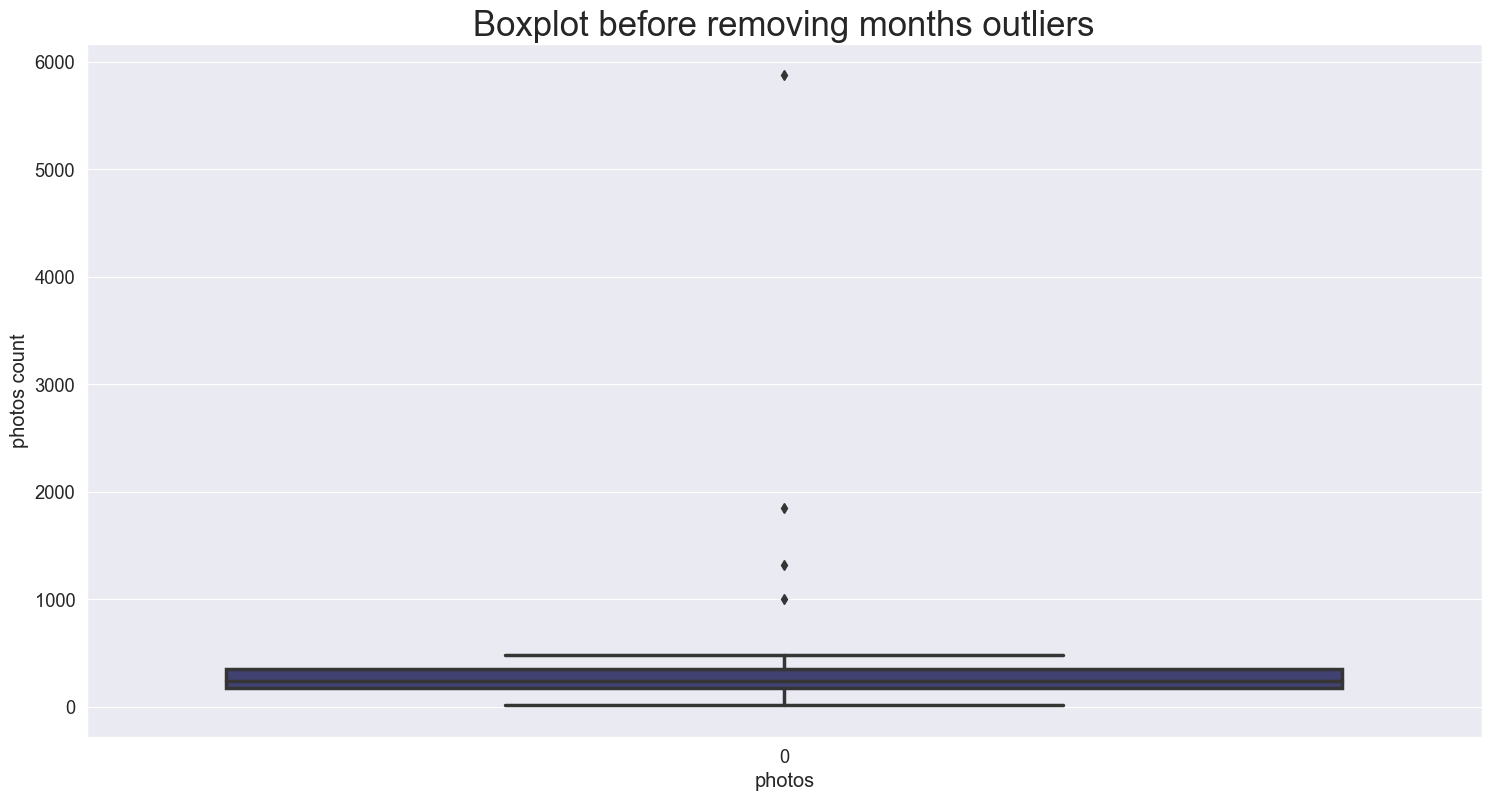

In [529]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot before removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

In [530]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

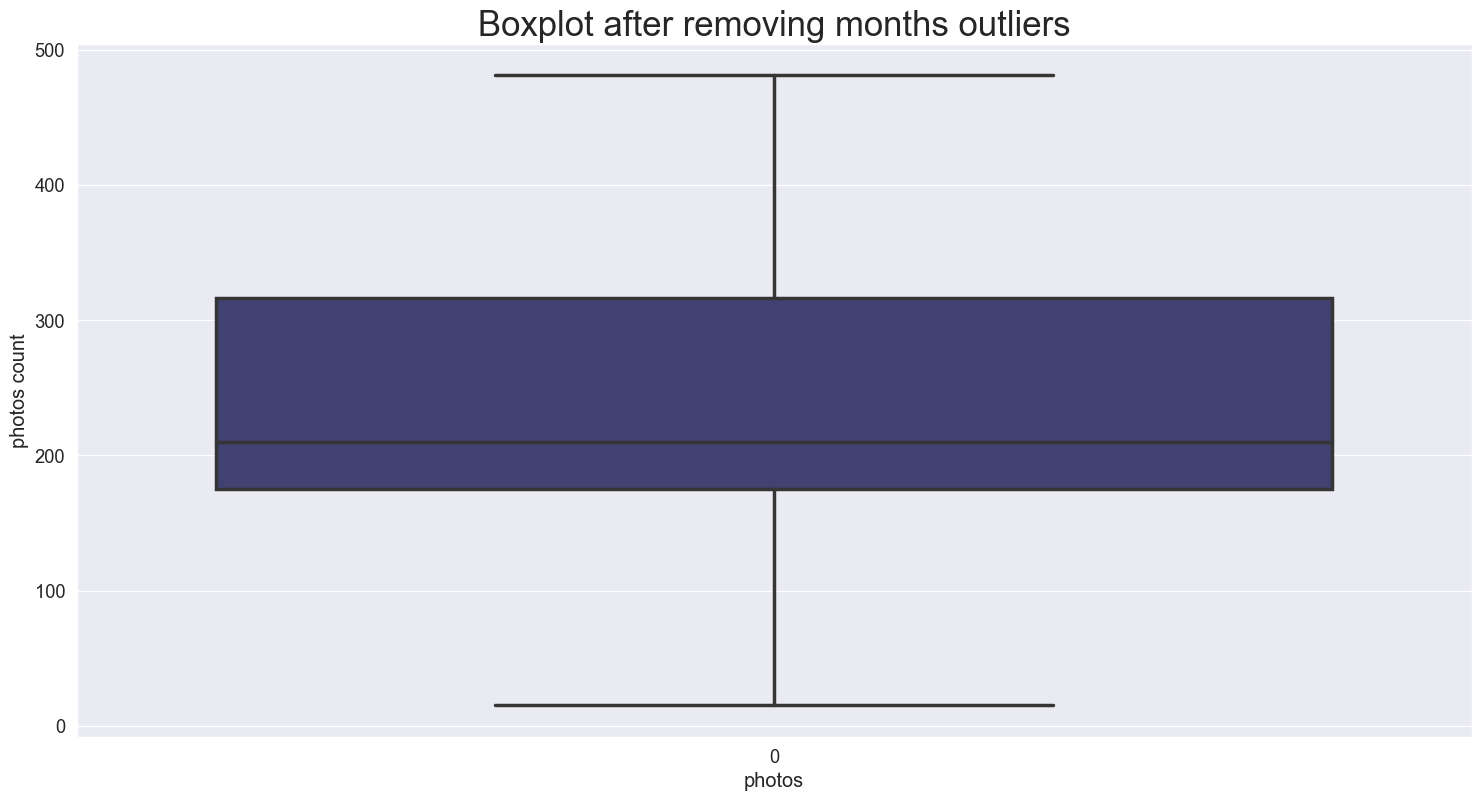

In [531]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'], color=primary_color)
plt.title('Boxplot after removing months outliers', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()

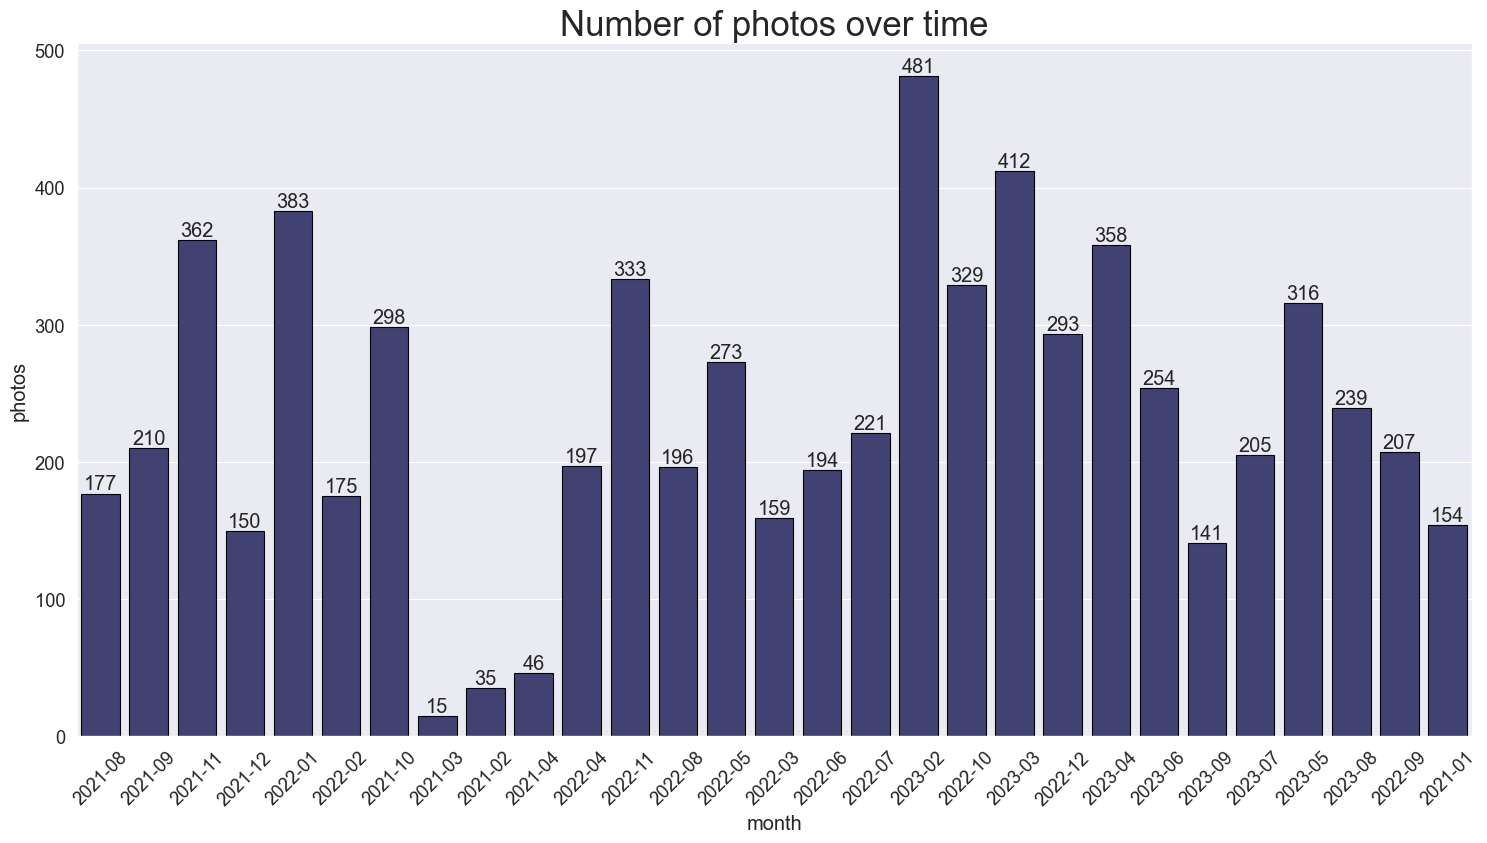

In [532]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', ec='black', color=primary_color)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

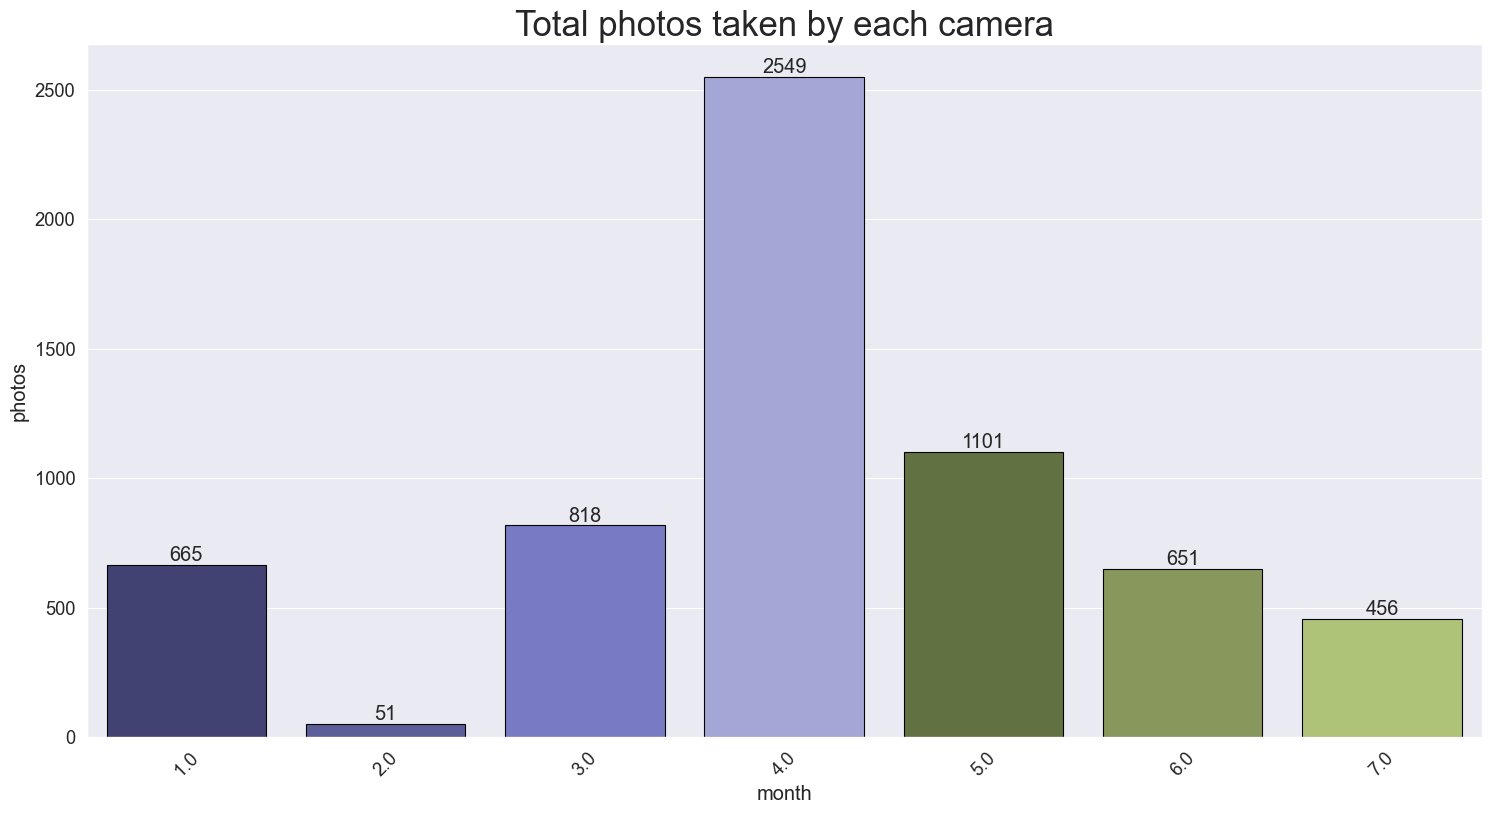

In [533]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='camera', ec='black')

plt.title('Total photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

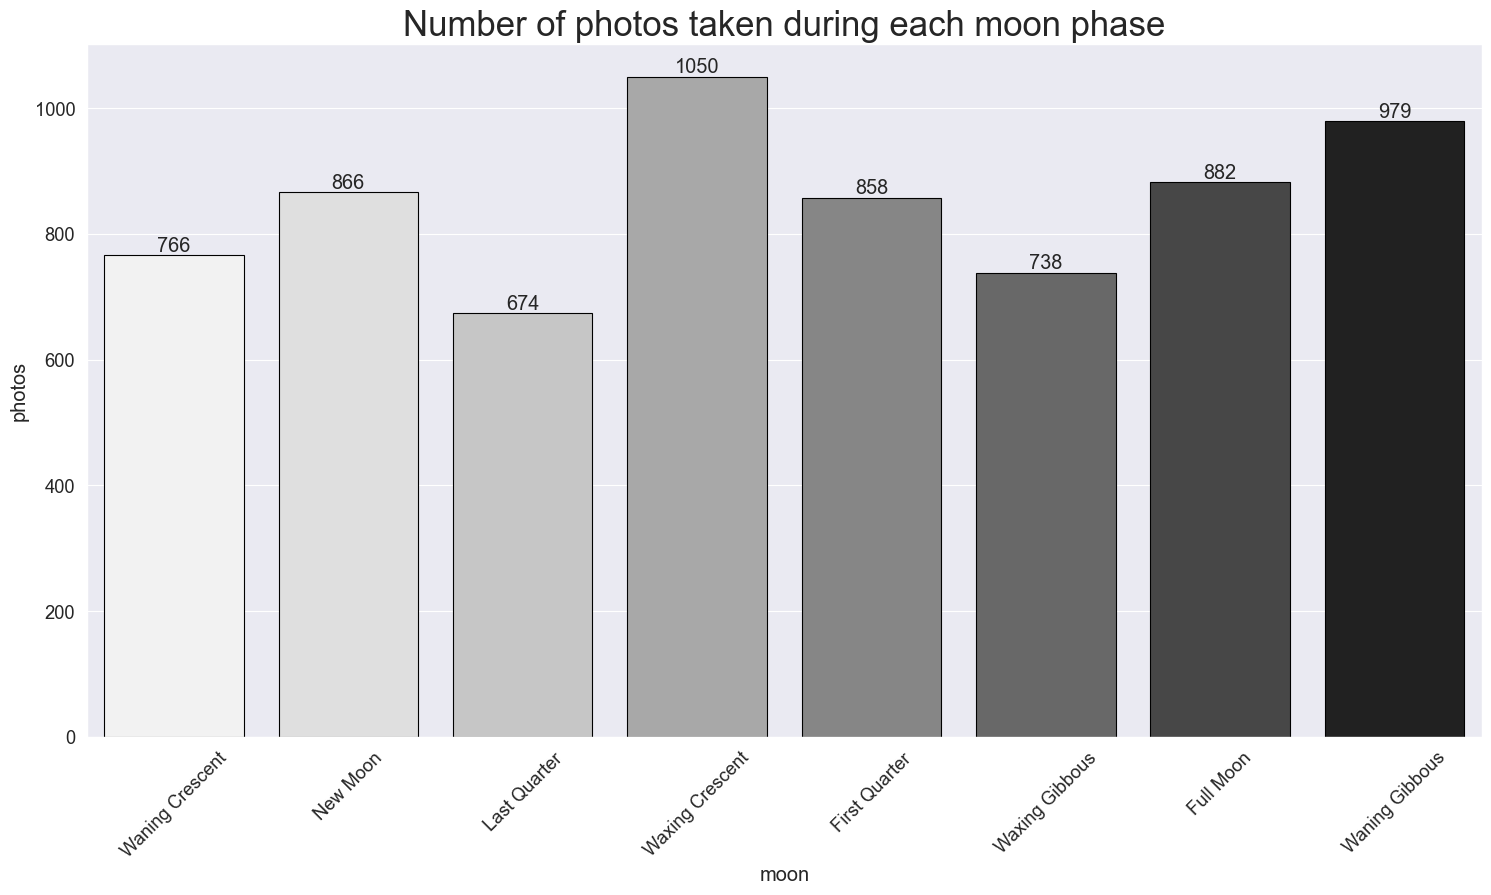

In [534]:
plt.figure(figsize=(18, 9))

ax = sns.countplot(data=df, x='moon', palette='Greys', ec='black')

plt.title('Number of photos taken during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

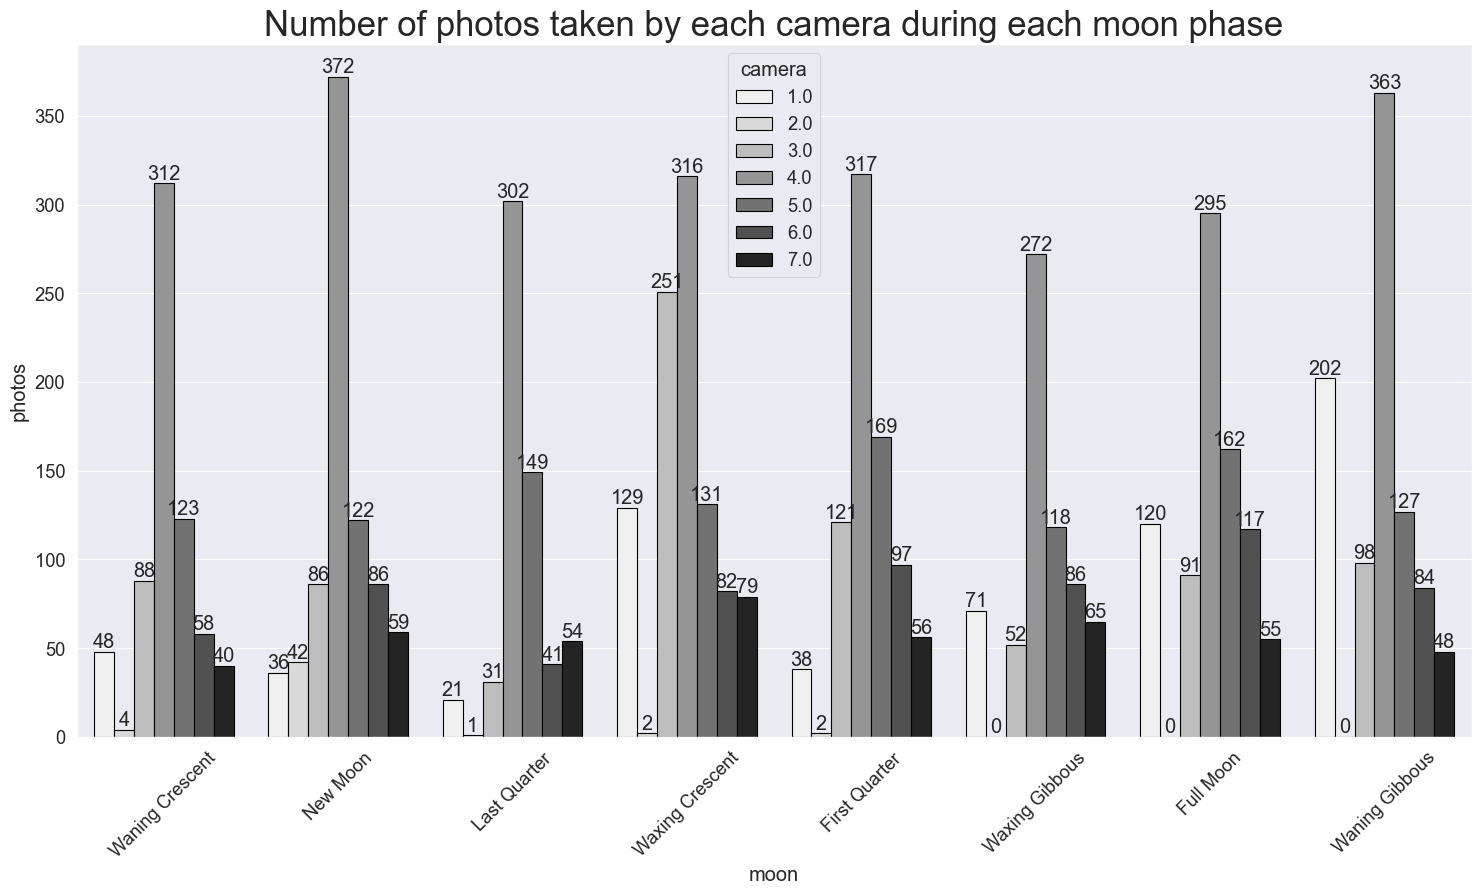

In [535]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera', palette='Greys', ec='black')

plt.title('Number of photos taken by each camera during each moon phase', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

for i in range(0, 7):
    ax.bar_label(ax.containers[i])

plt.show()

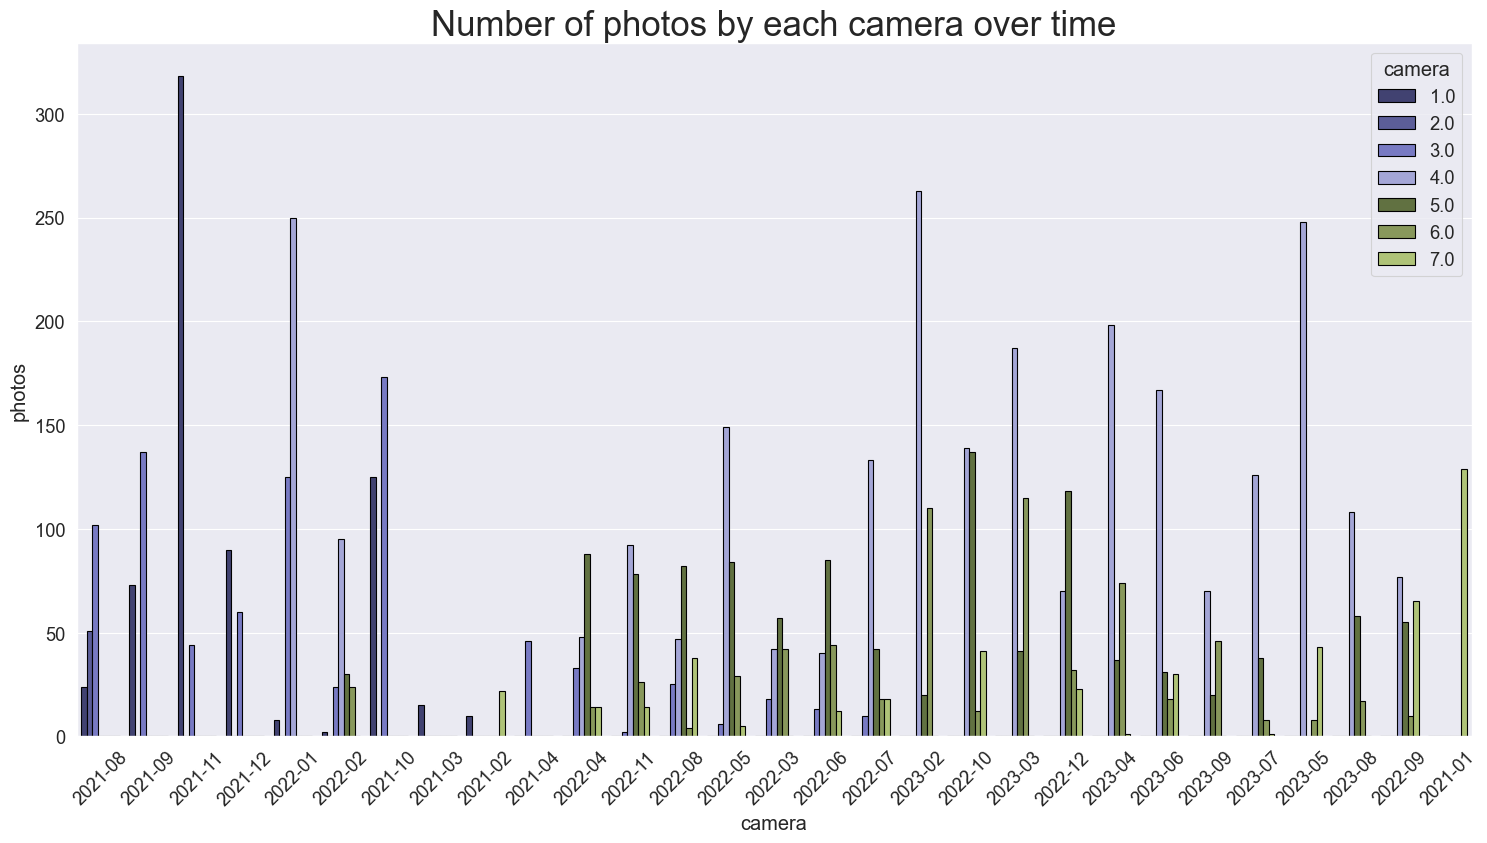

In [536]:
plt.figure(figsize=(18, 9))
sns.countplot(data=df, x="month", hue="camera", ec='black')
plt.title('Number of photos by each camera over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('camera')
plt.xticks(rotation=45)

plt.show()

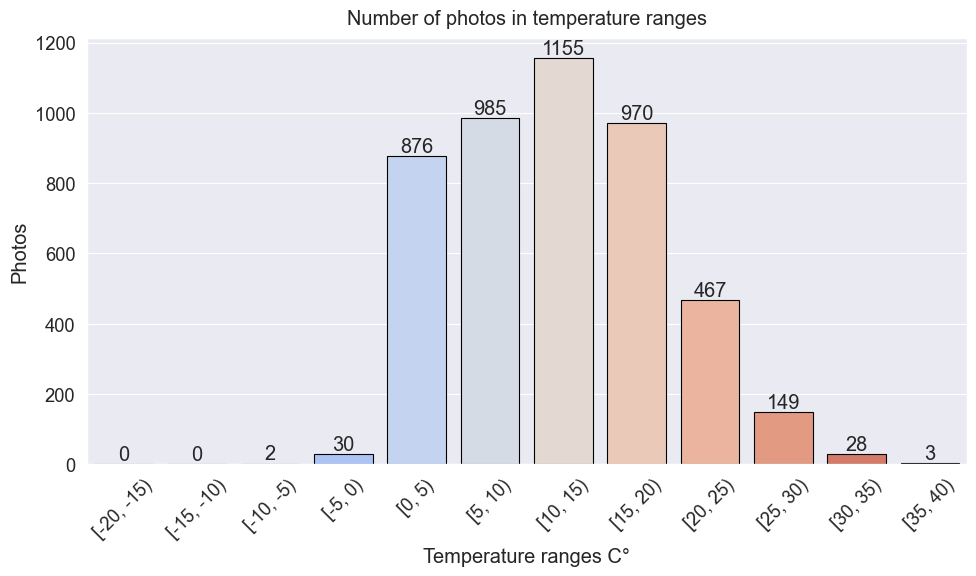

In [537]:
temperature_ranges = range(-20, 45, 5)

# Create a new column with temperature ranges
df['temp_range'] = pd.cut(df['temp'], bins=temperature_ranges, right=False)

# Group by temperature ranges and count occurrences
grouped_data = df.groupby('temp_range').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='temp_range', y='count', data=grouped_data, palette='coolwarm', ec='black')
plt.title('Number of photos in temperature ranges', pad=10)
plt.xlabel('Temperature ranges C°')
plt.ylabel('Photos')
plt.xticks(rotation=45)
plt.tight_layout()

ax.bar_label(ax.containers[0])
plt.show()


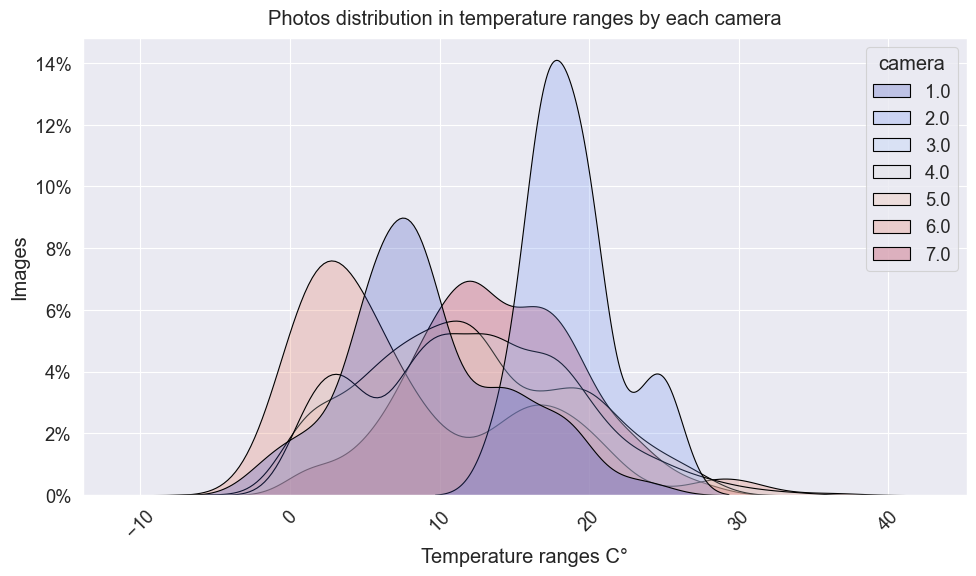

In [538]:
grouped_data = df.groupby(['temp_range', 'camera']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=df, x='temp', hue='camera', fill=True, palette='coolwarm', ec='black', common_norm=False)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(to_percent))

plt.title('Photos distribution in temperature ranges by each camera', pad=10)
plt.xlabel('Temperature ranges C°')
plt.ylabel('Images')
plt.xticks(rotation=45)
plt.tight_layout()
    
plt.show()


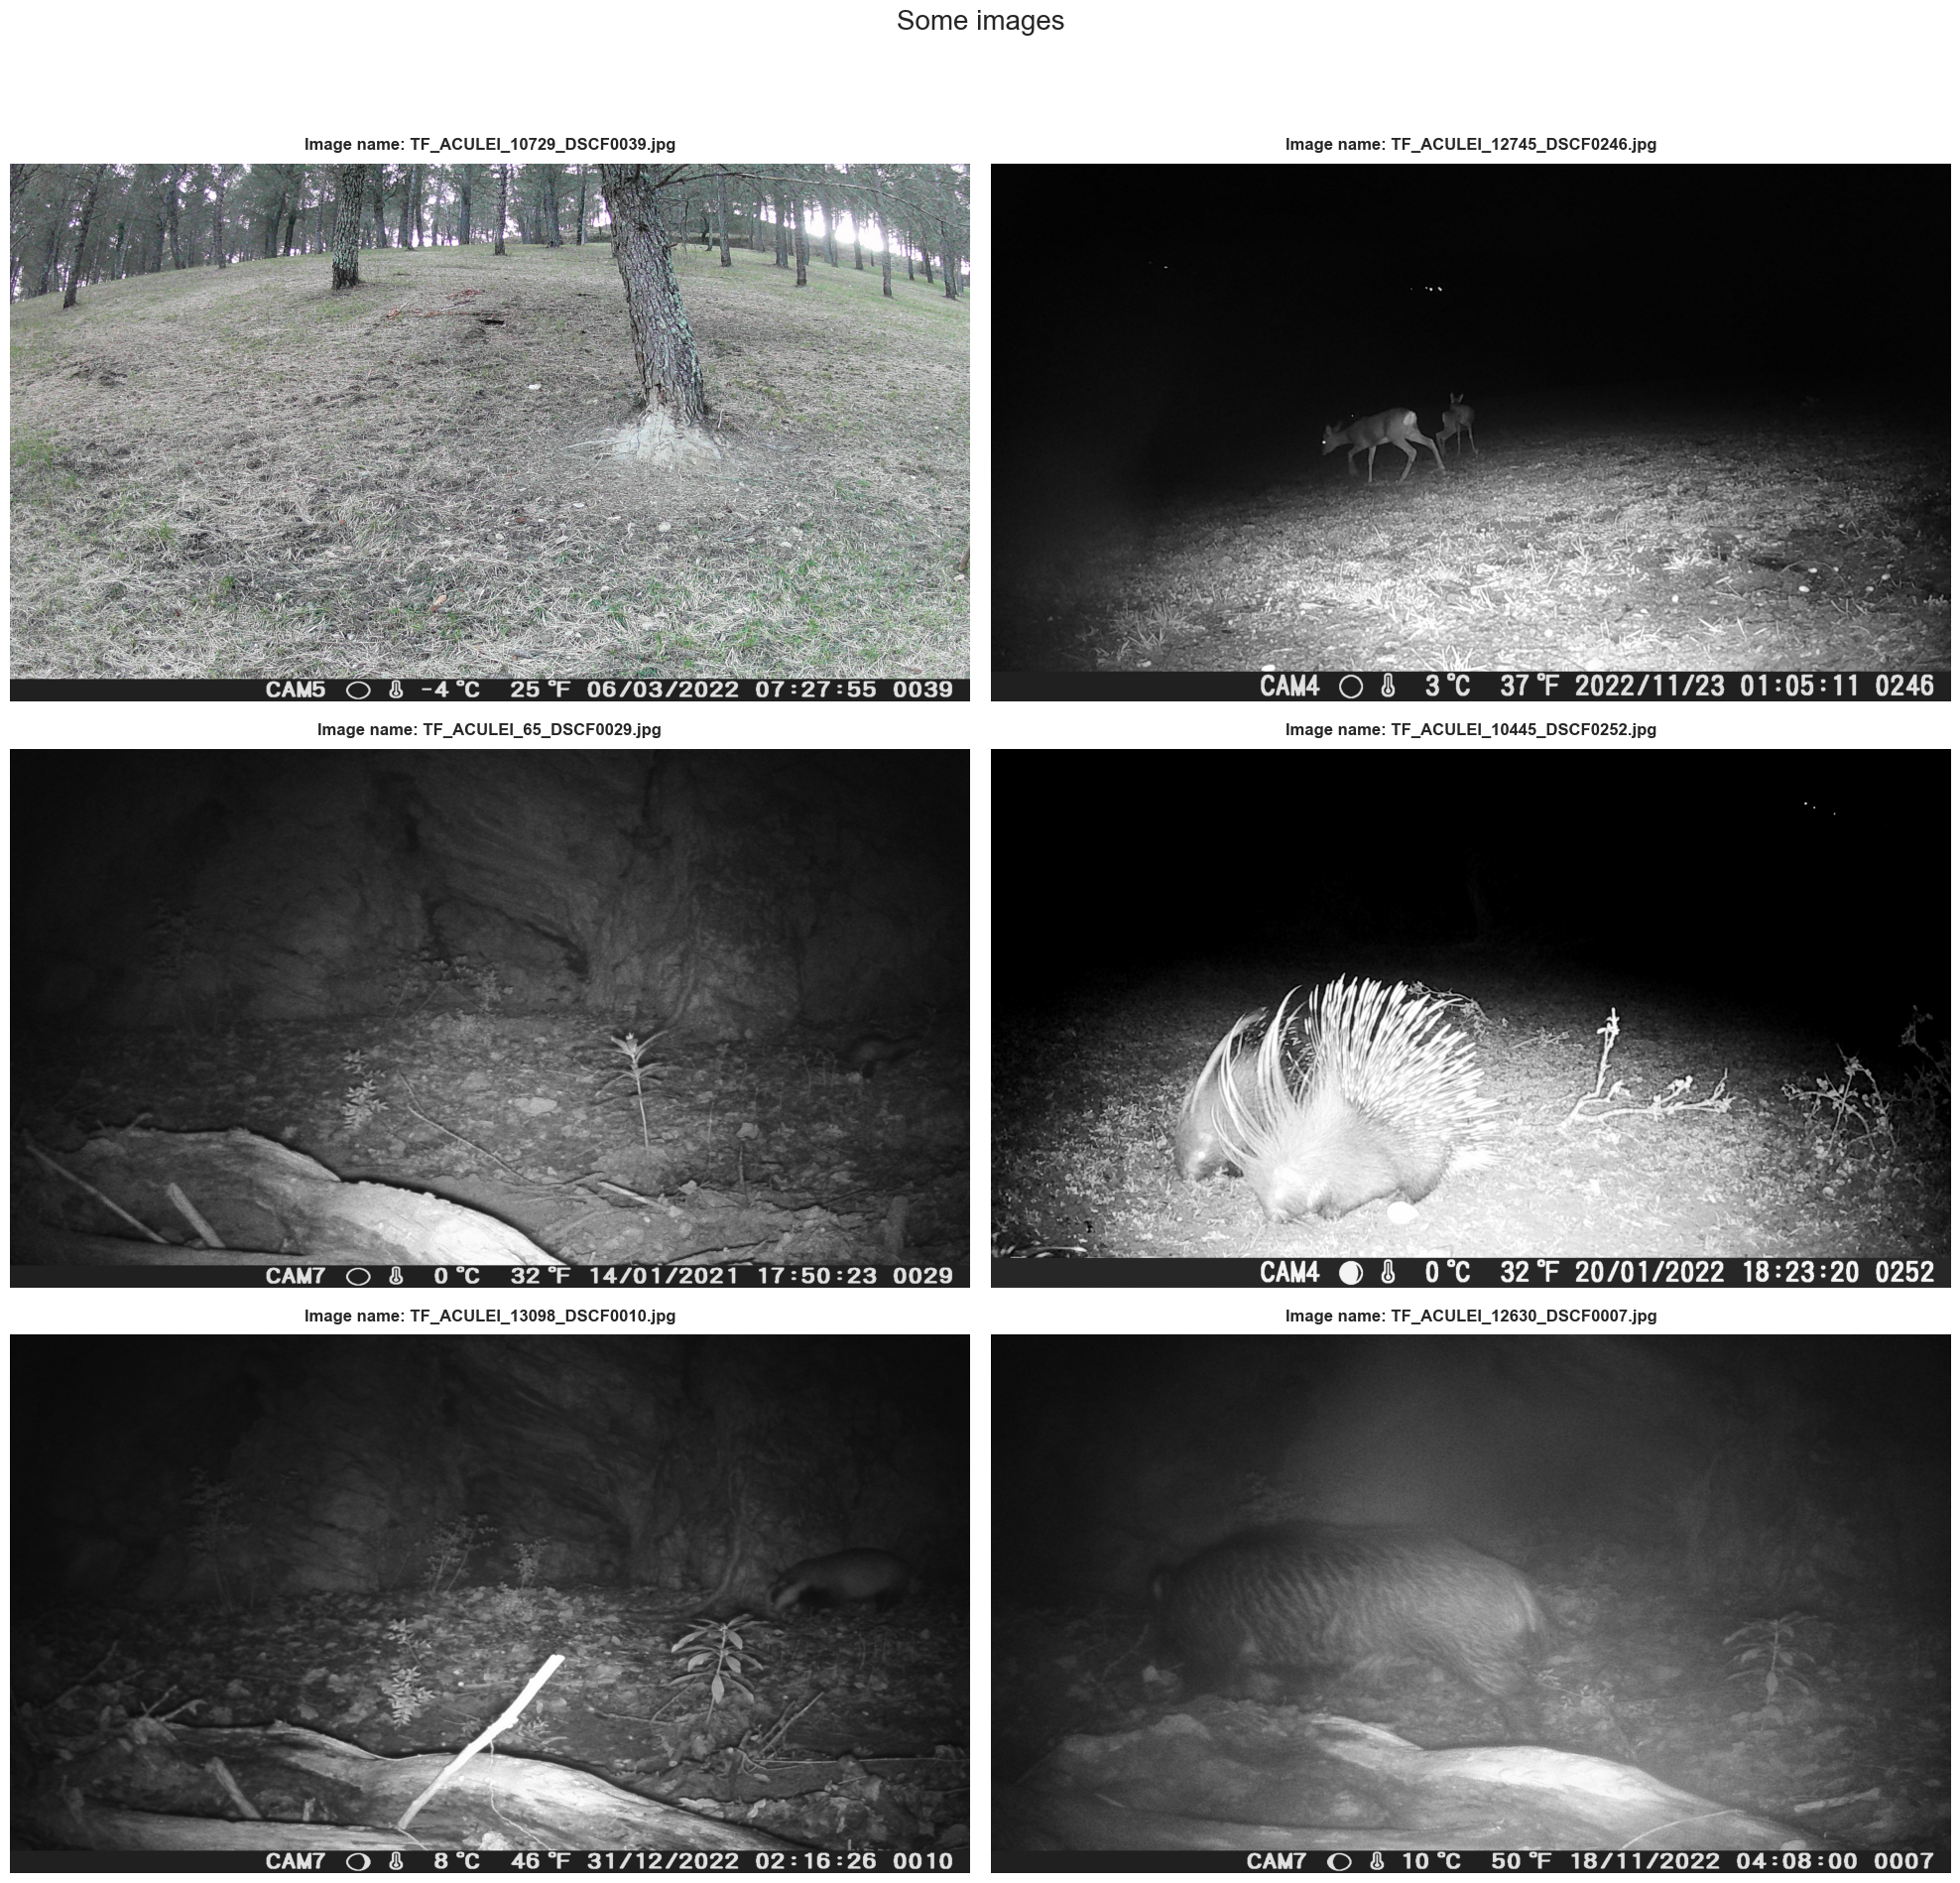

In [540]:
valid_rows = df.sample(6)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
fig.suptitle('Some images', fontsize=20)

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
    
for i, ax in enumerate(axes):
    image_path = os.path.join(image_folder_path, valid_rows.iloc[i]['image_name'])
    image = Image.open(image_path)
    ax.imshow(image, aspect='auto')
    ax.axis('off')

    image_name = valid_rows.iloc[i]['image_name']
    ax.set_title(f"Image name: {image_name}", fontsize=12, fontweight='bold', pad=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()